In [1]:
import numpy as np
import pandas as pd

#### team:04
BY M RAMYA SREE, METTU SIDDHARTHA, POLI VAMSI VARDHAN REDDY

# Fraud detection in banks 


In [2]:
data = pd.read_csv(r"C:\Users\himas\Downloads\fraud_detection_bank_dataset.csv\fraud_detection_bank_dataset.csv") 
data

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


In [3]:
# Remove the 1st column (Unnamed).
data = data.iloc[:,1:]

# Rename "targets" column to "is_fraud".
data.rename(columns={'targets': 'is_fraud'}, inplace=True) 

# Check for any null values in each column
print(f'Null Values: {sum(data.isnull().sum())}')

Null Values: 0


In [4]:
# Obtain the number of fraud & non-fraud objects.
class_balance = data.is_fraud.value_counts()
fraud_percentage = ((class_balance[1]/len(data))*100)

print(f'Non-Fraud: {class_balance[0]} '
      f'({(100-fraud_percentage).__round__(4)}%)')
print(f'Fraud: {class_balance[1]} '
      f'({fraud_percentage.__round__(4)}%)')

Non-Fraud: 15030 (73.4317%)
Fraud: 5438 (26.5683%)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
test_data_fraction = 0.2 # Allocate 20% of the data for testing.
random_seed = 20

X = data.iloc[:,0:-1] # Features (inputs).
y = data.is_fraud # Target (output).

# Verify all features are numerical
print(f'Feature Datatypes\n-----------------\n'
      f'{X.dtypes.value_counts()}\n')

# Split data into training (80%) and testing (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_fraction, 
                                                    random_state=random_seed)
# Obtain shape of training and testing data.
print('Training Shape\n--------------')
print(f'Input: {X_train.shape}')
print(f'Output: {y_train.shape}')

print('\nTesting Shape\n--------------')
print(f'Input: {X_test.shape}')
print(f'Output: {y_test.shape}')

Feature Datatypes
-----------------
int64      111
float64      1
dtype: int64

Training Shape
--------------
Input: (16374, 112)
Output: (16374,)

Testing Shape
--------------
Input: (4094, 112)
Output: (4094,)


In [7]:
def disp_confMatrix():
    cm = confusion_matrix(y_test, y_test_predicted)
    cmp = ConfusionMatrixDisplay(cm, display_labels=target_names)
    fig, ax = plt.subplots(figsize=(7,7))
    cmp.plot(ax=ax)
    plt.show()
    
    return None

In [8]:
target_names = ['non-fraud (0)', 'fraud (1)'] # Used for classification report.
false_pos = [] # Create list for false-positives.
false_neg = [] # Create list for false-negatives.
train_f1_scores = [] # Create list for training data F1 scores.
test_f1_scores = []  # Create list for testing data F1 scores.
train_accs = [] # Create list for training data accuracies.
test_accs = []  # Create list for testing data accuracies.

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import validation_curve

### DECISION TREE


In [10]:
#decision tree
from sklearn.tree import DecisionTreeClassifier 
model_d = DecisionTreeClassifier()
model_d = model_d.fit(X_train,y_train)
y_test_predicted1= model_d.predict(X_test)

#Evaluation using Accuracy score
from sklearn import metrics 
da=metrics.accuracy_score(y_test,y_test_predicted1 )*100
print("Accuracy:",da)

Accuracy: 90.52271617000488


In [11]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_predicted1)

array([[2782,  211],
       [ 177,  924]], dtype=int64)

In [12]:


#object
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predicted1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2993
           1       0.81      0.84      0.83      1101

    accuracy                           0.91      4094
   macro avg       0.88      0.88      0.88      4094
weighted avg       0.91      0.91      0.91      4094



In [13]:
# Create Decision Tree classifer object
model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_2 = model_2.fit(X_train,y_train)

#Predict the response for test dataset
y_test_predicted = model_2.predict(X_test)
y_train_predicted=model_2.predict(X_train)

dda=metrics.accuracy_score(y_test,y_test_predicted)*100
dda_t=metrics.accuracy_score(y_train,y_train_predicted)*100
# Model Accuracy
print("Accuracy of test :",dda)

print("Accuracy of train :",dda_t)


Accuracy of test : 86.44357596482658
Accuracy of train : 87.04042994992061


In [14]:
dp=metrics.precision_score(y_test,y_test_predicted )*100
dp_t=metrics.precision_score(y_train,y_train_predicted )*100
print("Precision of test :",dp)

print("Precision of train :",dp_t)

Precision of test : 69.472182596291
Precision of train : 70.92386170413754


In [15]:
dr=metrics.recall_score(y_test,y_test_predicted )*100
dr_t=metrics.recall_score(y_train,y_train_predicted )*100
print("Recall of test :",dr)

print("Recall of train :",dr_t)

Recall of test : 88.46503178928246
Recall of train : 86.55752824533087


In [16]:
df=metrics.f1_score(y_test, y_test_predicted)*100
df_t=metrics.f1_score(y_train, y_train_predicted)*100
print("f1 score of test :",df)

print("f1 score of train :",df_t)

f1 score of test : 77.82660807031561
f1 score of train : 77.96469366562823


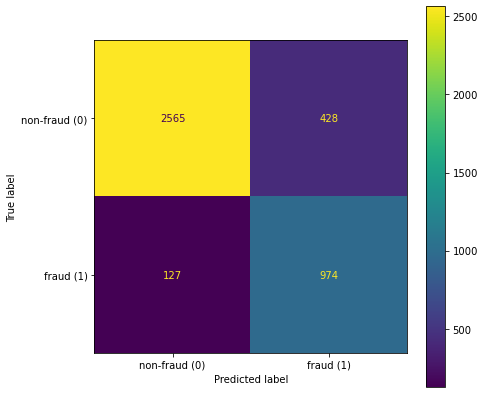

In [17]:
disp_confMatrix() 

In [18]:

dc=metrics.confusion_matrix(y_test,y_test_predicted)*100
dc_t=metrics.confusion_matrix(y_train,y_train_predicted)*100

print("Confusion Matrix of test :",dc)

print("Confusion Matrix of train :",dc_t)


Confusion Matrix of test : [[256500  42800]
 [ 12700  97400]]
Confusion Matrix of train : [[1049800  153900]
 [  58300  375400]]


### KNN - (K-Nearest Neighbour)

In [19]:

from sklearn.neighbors import KNeighborsClassifier


In [20]:
Knn=KNeighborsClassifier()
Knn.fit(X_train,y_train)
y_test_predicted=Knn.predict(X_test)
y_train_predicted=Knn.predict(X_train)
ka=metrics.accuracy_score(y_test,y_test_predicted)*100
ka_t=metrics.accuracy_score(y_train,y_train_predicted)*100

print("Accuracy of test :",ka)

print("Accuracy of train :",ka_t)

Accuracy of test : 84.53834880312652
Accuracy of train : 88.43898864052765


In [21]:
kp=metrics.precision_score(y_test,y_test_predicted)*100
kp_t=metrics.precision_score(y_train,y_train_predicted)*100
print("Precision of test :",kp)

print("Precision of train :",kp_t)

Precision of test : 73.35329341317365
Precision of train : 82.67379679144385


In [22]:
kr=metrics.recall_score(y_test,y_test_predicted)*100
kr_t=metrics.recall_score(y_train,y_train_predicted)*100
print("Recall of test :",kr)

print("Recall of train :",kr_t)

Recall of test : 66.7574931880109
Recall of train : 71.29352086695873


In [23]:
kf=metrics.f1_score(y_test,y_test_predicted)*100
kf_t=metrics.f1_score(y_train,y_train_predicted)*100
print("f1 score of test :",kf)

print("f1 score of train :",kf_t)

f1 score of test : 69.90014265335235
f1 score of train : 76.56308035161571


In [24]:
kc=metrics.confusion_matrix(y_test,y_test_predicted)*100
kc_t=metrics.confusion_matrix(y_train,y_train_predicted)*100
print("Confusion Matrix of test :",kc)

print("Confusion Matrix of train :",kc_t)

Confusion Matrix of test : [[272600  26700]
 [ 36600  73500]]
Confusion Matrix of train : [[1138900   64800]
 [ 124500  309200]]


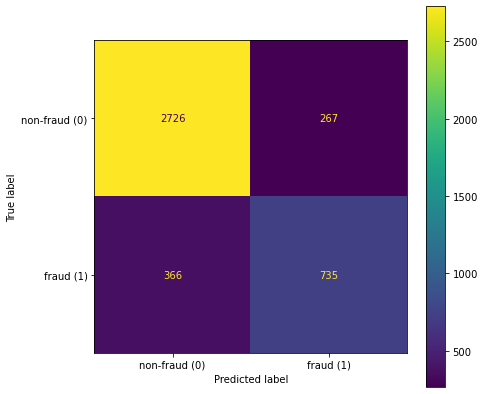

In [25]:
disp_confMatrix() 


### RANDOM FOREST

In [26]:


#random forest

from sklearn.ensemble import RandomForestClassifier


In [27]:
RR=RandomForestClassifier()
RR.fit(X_train,y_train)
y_test_predicted=RR.predict(X_test)
rr_a=metrics.accuracy_score(y_test,y_test_predicted)*100
rr_a_t=metrics.accuracy_score(y_train,y_train_predicted)*100
print("Accuracy of test :",rr_a)

print("Accuracy of train :",rr_a_t)



Accuracy of test : 93.25842696629213
Accuracy of train : 88.43898864052765


In [28]:
RP=metrics.precision_score(y_test,y_test_predicted)*100
RP_t=metrics.precision_score(y_train,y_train_predicted)*100
print("Precision of test :",RP)

print("Precision of train :",RP_t)

Precision of test : 90.72063178677196
Precision of train : 82.67379679144385


In [29]:
RRS=metrics.recall_score(y_test,y_test_predicted)*100
RRS_t=metrics.recall_score(y_train,y_train_predicted)*100
print("Recall of test :",RRS)

print("Recall of train :",RRS_t)

Recall of test : 83.46957311534968
Recall of train : 71.29352086695873


In [30]:
RF=metrics.f1_score(y_test,y_test_predicted)*100
RF_t=metrics.f1_score(y_train,y_train_predicted)*100
print("f1 score of test :",RF)

print("f1 score of train :",RF_t)

f1 score of test : 86.9441816461684
f1 score of train : 76.56308035161571


In [31]:
RC=metrics.confusion_matrix(y_test,y_test_predicted)*100
RC_t=metrics.confusion_matrix(y_train,y_train_predicted)*100
print("Confusion Matrix of test :",RC)

print("Confusion Matrix of train :",RC_t)

Confusion Matrix of test : [[289900   9400]
 [ 18200  91900]]
Confusion Matrix of train : [[1138900   64800]
 [ 124500  309200]]


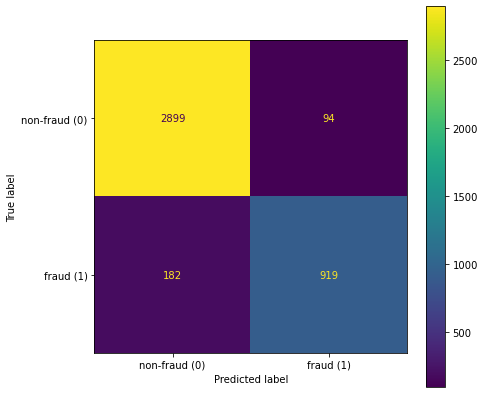

In [32]:
disp_confMatrix() 

### SVM - ( Support Vector Machine)


In [33]:

#SVM
from sklearn.svm import SVC 



In [34]:
SS=SVC()
SS.fit(X_train,y_train)
y_test_predicted=SS.predict(X_test)
y_train_predicted=SS.predict(X_train)
sa=metrics.accuracy_score(y_test,y_test_predicted)*100
sa_t=metrics.accuracy_score(y_train,y_train_predicted)*100
print("Accuracy of test :",sa)

print("Accuracy of train :",sa_t)

Accuracy of test : 73.10698583292623
Accuracy of train : 73.51288628313179


In [54]:
sp=metrics.precision_score(y_test,y_test_predicted)*100
sp_t=metrics.precision_score(y_train,y_train_predicted)*100
#sp=metrics.precision_score(y_train_predicted,y_test_predicted , pos_label='positive',average='micro')*100
print("Precision of test :",sp)

print("Precision of train :",sp_t)

Precision of test : 56.78346810422282
Precision of train : 57.983794089609155


In [55]:
sr=metrics.recall_score(y_test,y_test_predicted)*100
sr_t=metrics.recall_score(y_train,y_train_predicted)*100
print("Recall of test :",sr)

print("Recall of train :",sr_t)

sf=metrics.f1_score(y_test,y_test_predicted)*100
sf_t=metrics.f1_score(y_train,y_train_predicted)*100
print("f1 score of test :",sf)

print("f1 score of train :",sf_t)


Recall of test : 57.402361489554956
Recall of train : 56.09868572746139
f1 score of test : 57.091237579042456
f1 score of train : 57.02566506504161


In [56]:
sc=metrics.confusion_matrix(y_test,y_test_predicted)*100
sc_t=metrics.confusion_matrix(y_train,y_train_predicted)*100
print("Confusion Matrix of test :",sc)

print("Confusion Matrix of train :",sc_t)

Confusion Matrix of test : [[251200  48100]
 [ 46900  63200]]
Confusion Matrix of train : [[1027400  176300]
 [ 190400  243300]]


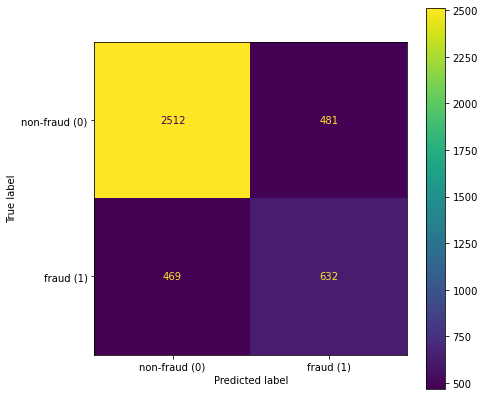

In [57]:
disp_confMatrix() 

### Logistic Regression

In [39]:

from sklearn.linear_model import LogisticRegression

In [40]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_test_predicted=LR.predict(X_test)
y_train_predicted=LR.predict(X_train)
la=metrics.accuracy_score(y_test,y_test_predicted)*100
la_t=metrics.accuracy_score(y_train,y_train_predicted)*100
print("Accuracy of test :",la)

print("Accuracy of train :",la_t)

Accuracy of test : 76.7953102100635
Accuracy of train : 77.60473922071577


C:\Users\himas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
lp=metrics.precision_score(y_test,y_test_predicted)*100
lp_t=metrics.precision_score(y_train,y_train_predicted)*100
#sp=metrics.precision_score(y_train_predicted,y_test_predicted , pos_label='positive',average='micro')*100
print("Precision of test :",lp)

print("Precision of train :",lp_t)

Precision of test : 56.78346810422282
Precision of train : 57.983794089609155


In [42]:
lr=metrics.recall_score(y_test,y_test_predicted)*100
lr_t=metrics.recall_score(y_train,y_train_predicted)*100
print("Recall of test :",lr)

print("Recall of train :",lr_t)


lf=metrics.f1_score(y_test,y_test_predicted)*100
lf_t=metrics.f1_score(y_train,y_train_predicted)*100
print("f1 score of test :",lf)

print("f1 score of train :",lf_t)


Recall of test : 57.402361489554956
Recall of train : 56.09868572746139
f1 score of test : 57.091237579042456
f1 score of train : 57.02566506504161


In [43]:
lc=metrics.confusion_matrix(y_test,y_test_predicted)*100
lc_t=metrics.confusion_matrix(y_train,y_train_predicted)*100
print("Confusion Matrix of test :",lc)

print("Confusion Matrix of train :",lc_t)




Confusion Matrix of test : [[251200  48100]
 [ 46900  63200]]
Confusion Matrix of train : [[1027400  176300]
 [ 190400  243300]]


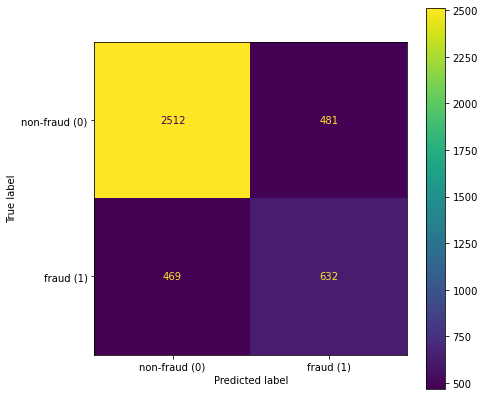

In [44]:
disp_confMatrix() 

###### Accuracy of test


In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy of test')

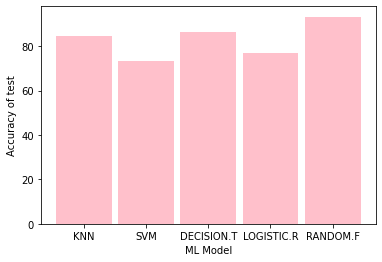

In [72]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[ka,sa,dda,la,rr_a]
plt.bar(x,y,width=0.9,color='pink')
plt.xlabel("ML Model")
plt.ylabel("Accuracy of test")

###### Accuracy of train


Text(0, 0.5, 'Accuracy of train')

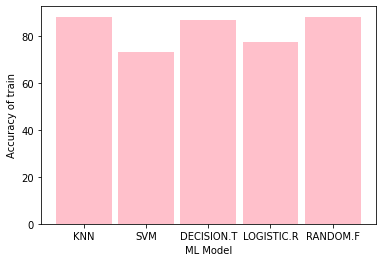

In [71]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[ka_t,sa_t,dda_t,la_t,rr_a_t]
plt.bar(x,y,width=0.9,color='pink')
plt.xlabel("ML Model")
plt.ylabel("Accuracy of train")

###### Precision of test

Text(0, 0.5, 'Precision of test')

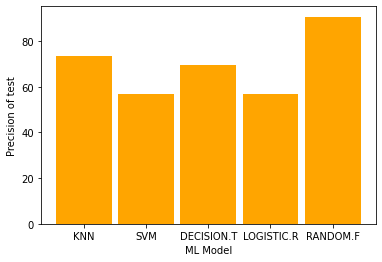

In [70]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[kp,sp,dp,lp,RP]
plt.bar(x,y,width=0.9,color='orange')
plt.xlabel("ML Model")
plt.ylabel("Precision of test")

###### Precision of train

Text(0, 0.5, 'Precision of train')

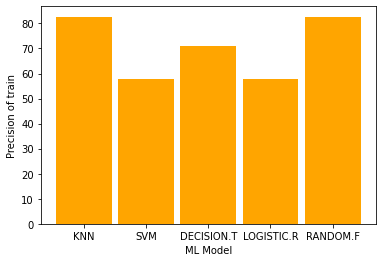

In [69]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[kp_t,sp_t,dp_t,lp_t,RP_t]
plt.bar(x,y,width=0.9,color='orange')
plt.xlabel("ML Model")
plt.ylabel("Precision of train")

###### recall_score of test

Text(0, 0.5, 'recall_score of test')

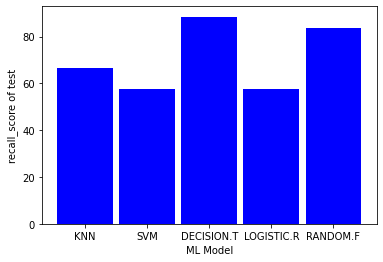

In [68]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[kr,sr,dr,lr,RRS]
plt.bar(x,y,width=0.9,color='BLUE')
plt.xlabel("ML Model")
plt.ylabel("recall_score of test")

###### recall_score of train

Text(0, 0.5, 'recall_score of train')

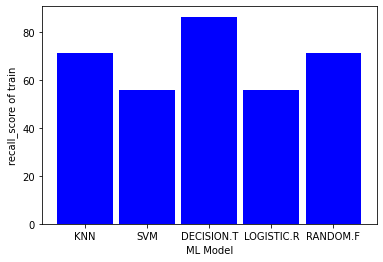

In [67]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[kr_t,sr_t,dr_t,lr_t,RRS_t]
plt.bar(x,y,width=0.9,color='BLUE')
plt.xlabel("ML Model")
plt.ylabel("recall_score of train")

###### f1_score of test

Text(0, 0.5, 'f1_score of test')

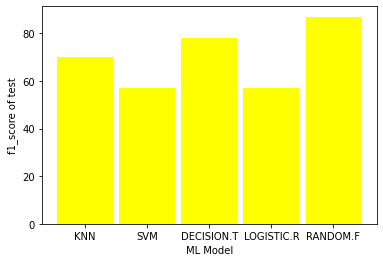

In [66]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[kf,sf,df,lf,RF]
plt.bar(x,y,width=0.9,color='YELLOW')
plt.xlabel("ML Model")
plt.ylabel("f1_score of test")

###### f1_score of train

Text(0, 0.5, 'f1_score of train')

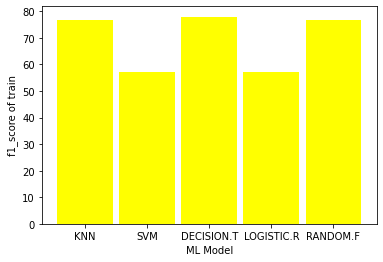

In [65]:
x=['KNN','SVM','DECISION.T','LOGISTIC.R','RANDOM.F']
y=[kf_t,sf_t,df_t,lf_t,RF_t]
plt.bar(x,y,width=0.9,color='YELLOW')
plt.xlabel("ML Model")
plt.ylabel("f1_score of train")

### CONCLUSION:


1. Accuracy for test is high in:  Random Forest > Decision Tree > K-NN > Logistic regression > SVM<br>
2. Precision score for test is high in: Random Forest > K-NN > Decision tree > SVM > Logistic regression<br>
3. Re-call score for test is high in : Decision tree > Random Forest > K-NN > SVM > Logistic regression<br>
4. f1_score for test is high in :  Random Forest > Decision tree > K-NN > Logistic regression > SVM